#Importando as Bibliotecas

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Carregando o Data Set

In [35]:
df = pd.read_csv("jena_climate_2009_2016.csv")

#Condere no Data Set

In [36]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


Deletar o dateTime 01.01.2009 00:10:00	

#Modificandodas colunas "Date Time" e "T (degC)" 

In [5]:
df.rename(columns={"Date Time": "DateTime", "T (degC)": "T_(degC)"}, inplace=True)


Setando o formato DateTime

In [6]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d.%m.%Y %H:%M:%S')


#Transformando DateTime no Index

In [7]:
df.set_index("DateTime", inplace=True)

#Criando de duas séries temporais, com intervalos de 10 minutos e 60 minutos.

In [8]:
df_10min = df.resample('10T').mean()
df_60min = df.resample('60T').mean()

#Confere ST 10 minutos

In [9]:
df_10min

,p (mbar),T_(degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


#Confere ST 60 minutos

In [10]:
df_60min

,p (mbar),T_(degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,265.118000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000
2009-01-01 01:00:00,996.525000,-8.065000,265.361667,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667
2009-01-01 02:00:00,996.745000,-8.763333,264.645000,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 03:00:00,996.986667,-8.896667,264.491667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 04:00:00,997.158333,-9.348333,264.026667,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,1001.410000,-2.503333,270.546667,-7.025000,71.080000,5.086667,3.601667,1.485000,2.240000,3.596667,1287.168333,0.923333,1.526667,203.533333
2016-12-31 21:00:00,1001.063333,-2.653333,270.426667,-6.970000,72.016667,5.025000,3.616667,1.406667,2.248333,3.611667,1287.406667,0.573333,1.250000,98.366667
2016-12-31 22:00:00,1000.511667,-3.553333,269.568333,-7.348333,74.916667,4.698333,3.515000,1.188333,2.188333,3.513333,1291.060000,0.816667,1.410000,167.958333


#Plotagem gráfico séreie 10 min

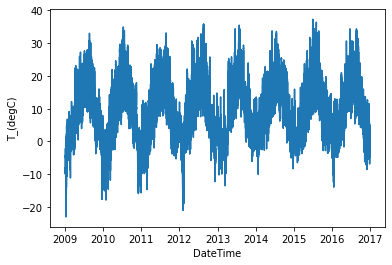

In [12]:
sns.lineplot(data=df_10min, x=df_10min.index, y="T_(degC)")
plt.show()

#Plotagem gráfico séreie 60 min

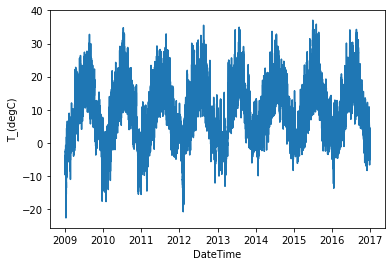

In [13]:
sns.lineplot(data=df_60min, x=df_60min.index, y="T_(degC)")
plt.show()

#Duas etapas 

In [14]:
df_10min_2step = df_10min.shift(-2)
df_60min_2step = df_60min.shift(-2)

#2 passos para 10min

In [28]:
df_10min_2step 

,p (mbar),T_(degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:20:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:30:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 00:40:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 00:50:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
2016-12-31 23:30:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
2016-12-31 23:40:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


#Gráfico 2passos 10min

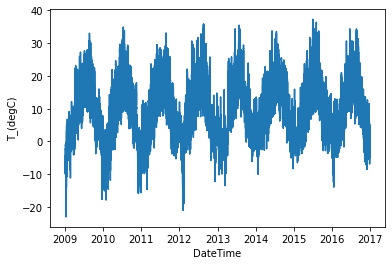

In [31]:
sns.lineplot(data=df_10min_2step, x=df_10min_2step.index, y="T_(degC)")
plt.show()

#2 passos para 60min

In [33]:
df_60min_2step

,p (mbar),T_(degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
DateTime,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.745000,-8.763333,264.645000,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 01:00:00,996.986667,-8.896667,264.491667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 02:00:00,997.158333,-9.348333,264.026667,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333
2009-01-01 03:00:00,997.510000,-9.716667,263.630000,-10.710000,92.383333,2.915000,2.695000,0.223333,1.681667,2.700000,1317.700000,0.325000,0.813333,118.886667
2009-01-01 04:00:00,997.955000,-9.298333,264.015000,-10.280000,92.483333,3.016667,2.786667,0.225000,1.738333,2.793333,1316.151667,0.818333,1.501667,145.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,1000.511667,-3.553333,269.568333,-7.348333,74.916667,4.698333,3.515000,1.188333,2.188333,3.513333,1291.060000,0.816667,1.410000,167.958333
2016-12-31 21:00:00,999.991667,-3.746667,269.413333,-8.161667,71.270000,4.628333,3.293333,1.331667,2.053333,3.293333,1291.415000,0.971667,1.650000,223.600000
2016-12-31 22:00:00,999.820000,-4.820000,268.360000,-8.420000,75.700000,4.270000,3.230000,1.040000,2.010000,3.230000,1296.380000,1.230000,1.960000,184.900000


#Gráfico 2passos 60min

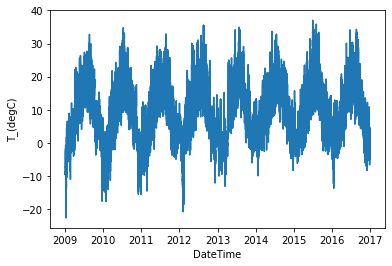

In [34]:
sns.lineplot(data=df_60min_2step, x=df_60min_2step.index, y="T_(degC)")
plt.show()